# NaN Boxing Benchmarks

In [1]:
# Librairies
%pip install -q matplotlib numpy pandas scikit-learn
import numpy as np
import re
import subprocess
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
INTERPRETER = "./target/release/som-interpreter-bc"
LIBS = "core-lib/Smalltalk core-lib/Examples/Benchmarks core-lib/Examples/Benchmarks/LanguageFeatures core-lib/Examples/Benchmarks/TestSuite core-lib/Examples/Benchmarks/ValBenchmark"

def exec_bench(name, runs=10):
    runtimes = []
    allocations = []

    for i in range(runs):
        cmd = f"{INTERPRETER} -c {LIBS} . -- BenchmarkHarness {name} 1"
        
        result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
        output = result.stdout

        runtime = re.search(r"runtime: (\d+)us", output)
        allocated = re.search(r"Allocated:    (\d+)bytes", output)
        if runtime:
            runtimes.append(int(runtime.group(1)))
        if allocated:
            allocations.append(int(allocated.group(1)))

        else:
            print("Runtime not found in output:")
            print(output)
    
    return (runtimes, allocations)


In [3]:
def plot_results(name, runtimes, allocations):
    import matplotlib.pyplot as plt

    iterations = list(range(1, len(runtimes) + 1))
    avg_runtime = sum(runtimes) / len(runtimes)
    avg_alloc = sum(allocations) / len(allocations)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    # Runtime plot (top)
    ax1.plot(iterations, runtimes, marker='o', linestyle='-', color='blue', label='Runtime (μs)')
    ax1.axhline(avg_runtime, color='blue', linestyle='--', label=f'Avg Runtime: {avg_runtime:.1f}μs')
    ax1.set_ylabel('Runtime (μs)')
    ax1.set_title(f'Benchmark: {name}')
    ax1.legend()
    ax1.grid(True)

    # Allocation plot (bottom)
    ax2.bar(iterations, allocations, color='orange', alpha=0.6, label='Allocation (bytes)')
    ax2.axhline(avg_alloc, color='orange', linestyle='--', label=f'Avg Alloc: {avg_alloc:.0f} bytes')
    ax2.set_ylabel('Allocation (bytes)')
    ax2.set_xlabel('Iteration')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


Benchmark: DoubleBench, Runs: 100, Runtimes: [2, 3, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 5, 3, 3, 3, 2, 3, 2, 4, 3, 2, 3, 2, 3, 3, 3, 4, 3, 3, 6, 2, 2, 3, 3, 3, 3, 8, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


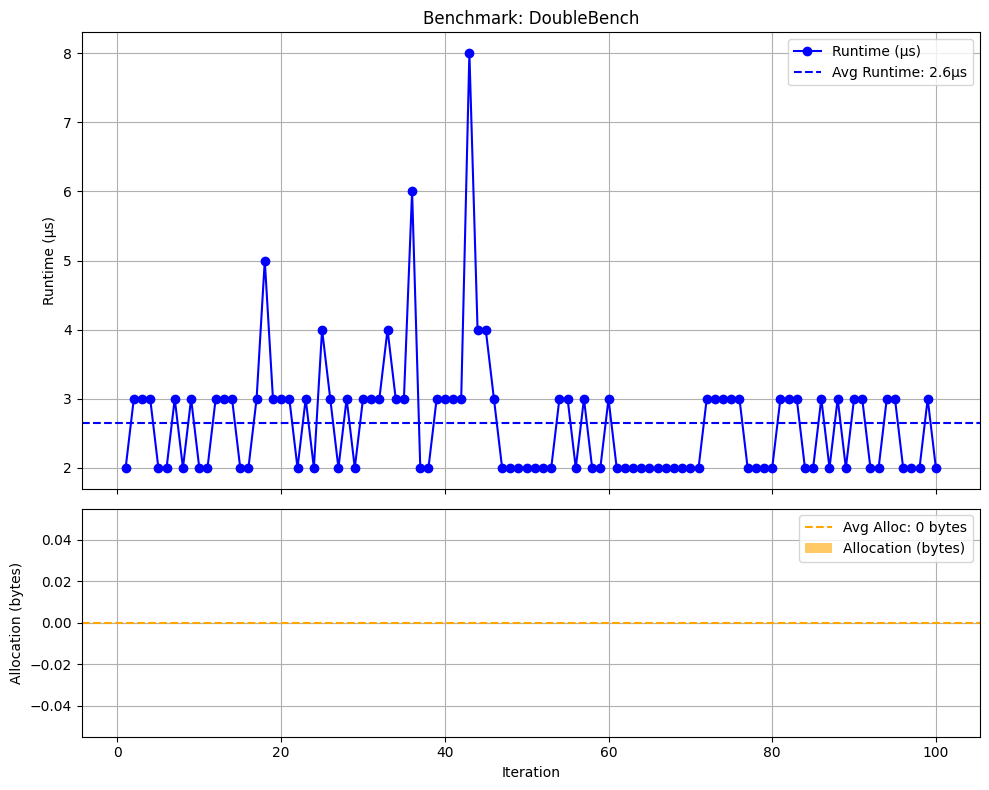

Benchmark: DoubleMedBench, Runs: 100, Runtimes: [7, 6, 7, 8, 7, 5, 6, 6, 6, 7, 6, 7, 6, 6, 7, 6, 6, 7, 8, 7, 5, 8, 6, 8, 8, 8, 7, 5, 6, 6, 6, 6, 5, 6, 6, 6, 7, 8, 5, 6, 5, 6, 6, 8, 7, 7, 5, 7, 7, 7, 5, 6, 8, 8, 7, 6, 7, 6, 6, 5, 8, 8, 7, 6, 5, 7, 6, 8, 6, 7, 7, 7, 8, 6, 7, 7, 6, 5, 5, 6, 6, 6, 6, 6, 11, 6, 6, 5, 7, 6, 5, 5, 6, 6, 5, 6, 6, 8, 6, 6], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


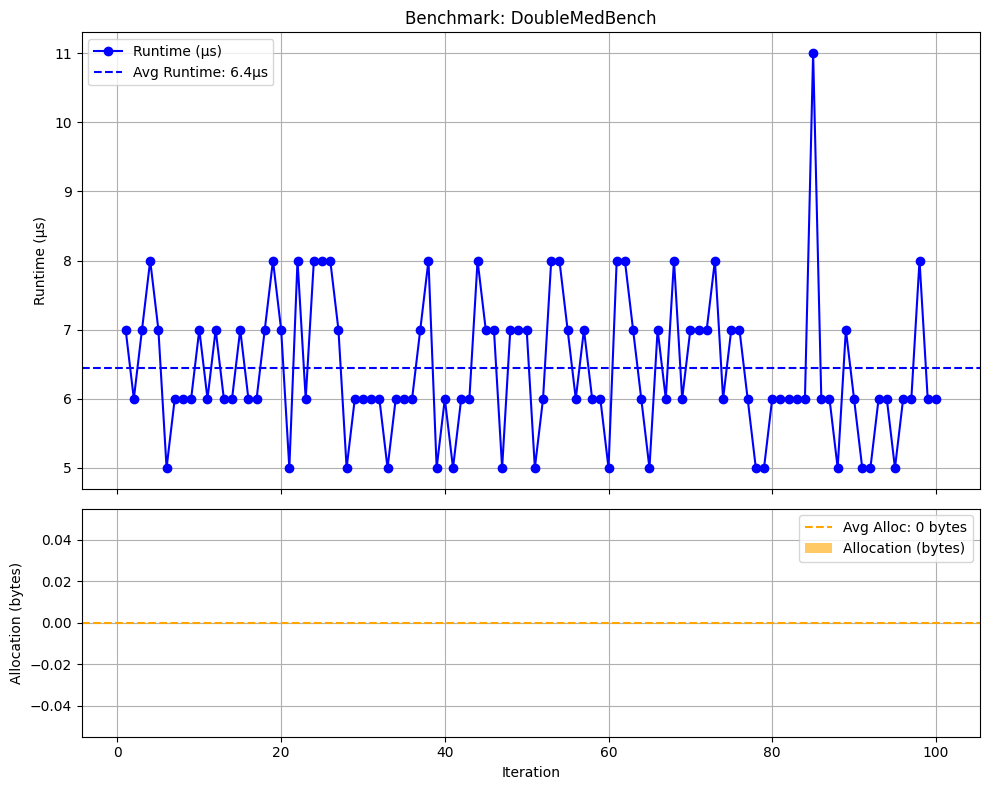

Benchmark: DoubleHighBench, Runs: 100, Runtimes: [9699, 9462, 9362, 9349, 9381, 9486, 9345, 9392, 9428, 9537, 9463, 9545, 9552, 9772, 9595, 9593, 9491, 9435, 9407, 9464, 9454, 9417, 9470, 9574, 9501, 9355, 9359, 9442, 9298, 9331, 9378, 9377, 9355, 9368, 9470, 9615, 9508, 9604, 9637, 9712, 9460, 9558, 9588, 9795, 9530, 9349, 9363, 9417, 9452, 9328, 9688, 9218, 9348, 9407, 9326, 9389, 9455, 9363, 9378, 15422, 14224, 9424, 9495, 9803, 9517, 9762, 9903, 9526, 9432, 9419, 9468, 9571, 9445, 9498, 9426, 9604, 9455, 9612, 9585, 9401, 9549, 9471, 9565, 9384, 9503, 9323, 9353, 9608, 9458, 9622, 9586, 9520, 9565, 9448, 9420, 9604, 9473, 9546, 9441, 9336], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


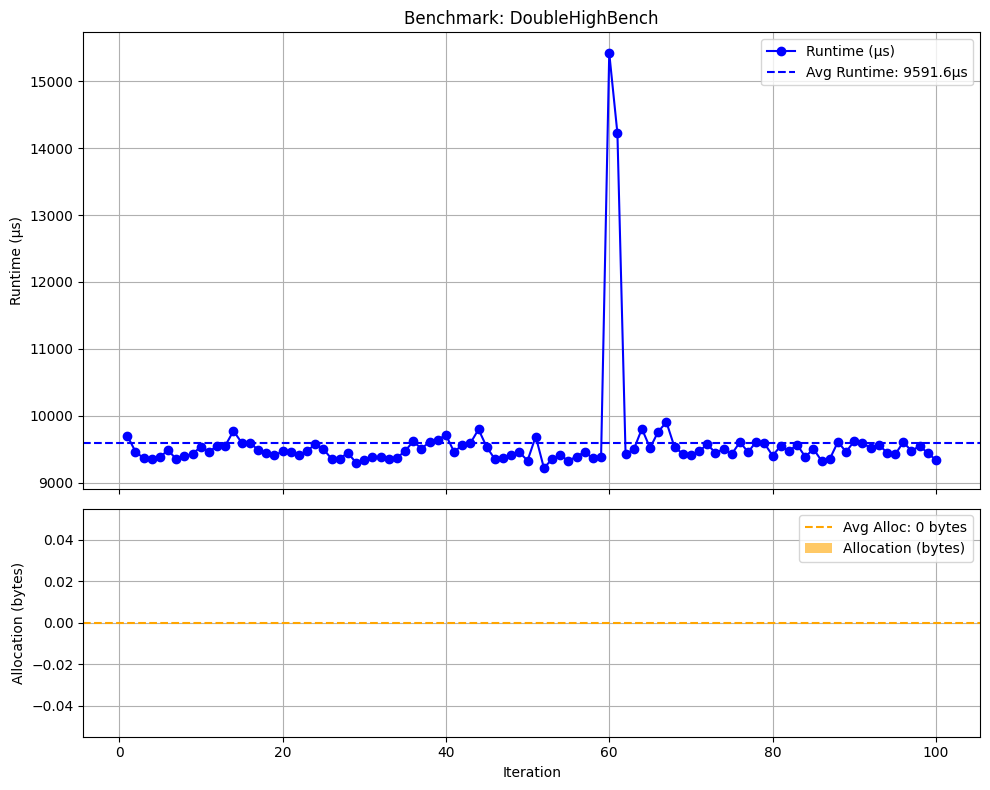

Benchmark: DoubleSqrtBench, Runs: 100, Runtimes: [1119, 1091, 1080, 1108, 1079, 1072, 1068, 1076, 1072, 1091, 1112, 1049, 1088, 1083, 1078, 1039, 1284, 1153, 1112, 1068, 1074, 1079, 1045, 1051, 1047, 1123, 1058, 1057, 1076, 1049, 1067, 1065, 1056, 1067, 1041, 1096, 1129, 1085, 1079, 1094, 1060, 1075, 1089, 1185, 1092, 1161, 1078, 1069, 1081, 1068, 1183, 1112, 1081, 1067, 1068, 1113, 1101, 1081, 1073, 1098, 1084, 1062, 1117, 1094, 1076, 1098, 1065, 1142, 1117, 1088, 1110, 1082, 1122, 1096, 1072, 1247, 1061, 1074, 1081, 1065, 1066, 1087, 1095, 1060, 1104, 1035, 1063, 1089, 1066, 1049, 1053, 1106, 1106, 1069, 1049, 1088, 1077, 1086, 1091, 1076], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


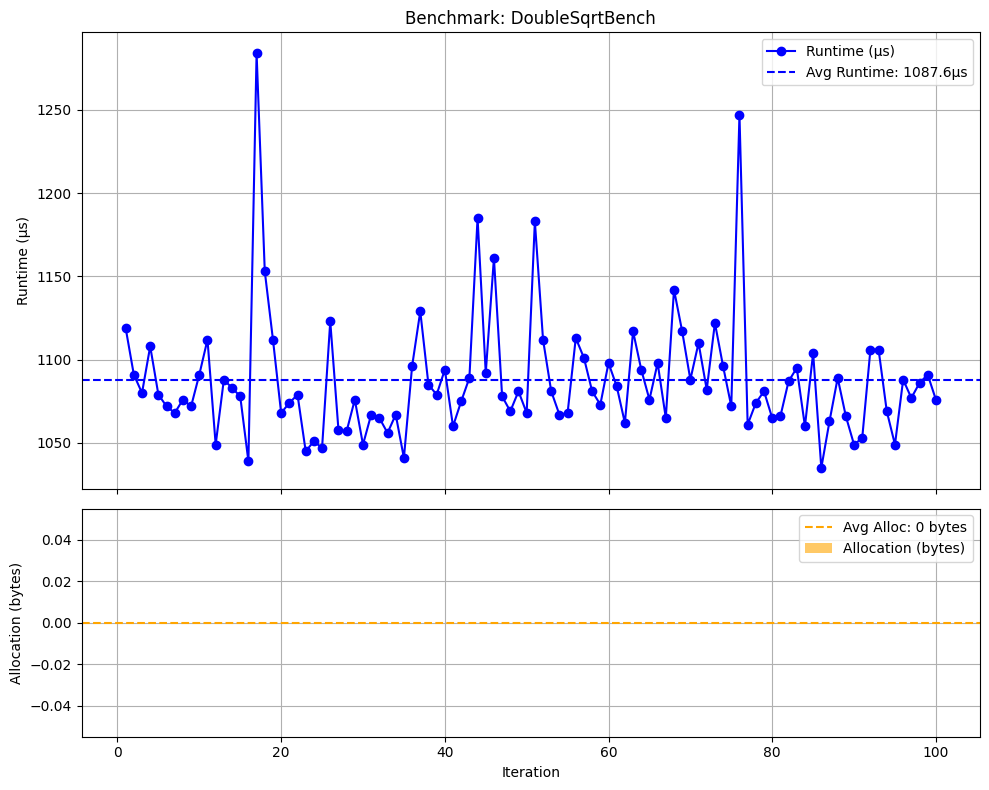

Benchmark: DoubleLExpBench, Runs: 100, Runtimes: [35, 30, 24, 25, 24, 25, 29, 24, 25, 25, 25, 25, 25, 29, 24, 25, 26, 24, 25, 25, 26, 26, 28, 25, 24, 27, 39, 25, 24, 28, 29, 25, 28, 26, 26, 48, 25, 26, 26, 26, 25, 25, 25, 30, 24, 33, 26, 25, 24, 39, 27, 32, 24, 29, 25, 26, 25, 25, 30, 26, 24, 24, 25, 24, 33, 26, 25, 25, 26, 24, 24, 25, 24, 24, 30, 28, 25, 25, 25, 24, 30, 30, 27, 25, 25, 24, 25, 32, 31, 29, 26, 26, 24, 28, 28, 29, 31, 31, 28, 25], Allocations: [32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 327

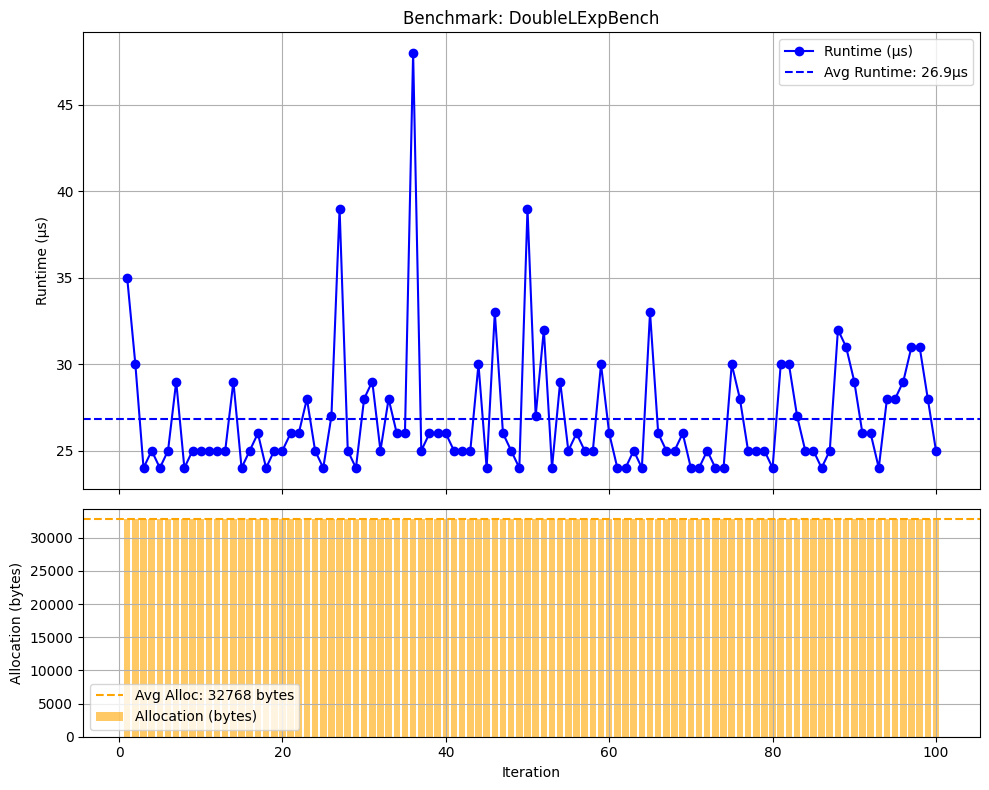

Benchmark: IntegerBench, Runs: 100, Runtimes: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 4, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 2, 3, 3, 4, 2, 2, 2, 2, 1, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 4, 2, 2, 4, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 4, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 6, 3, 3, 2], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


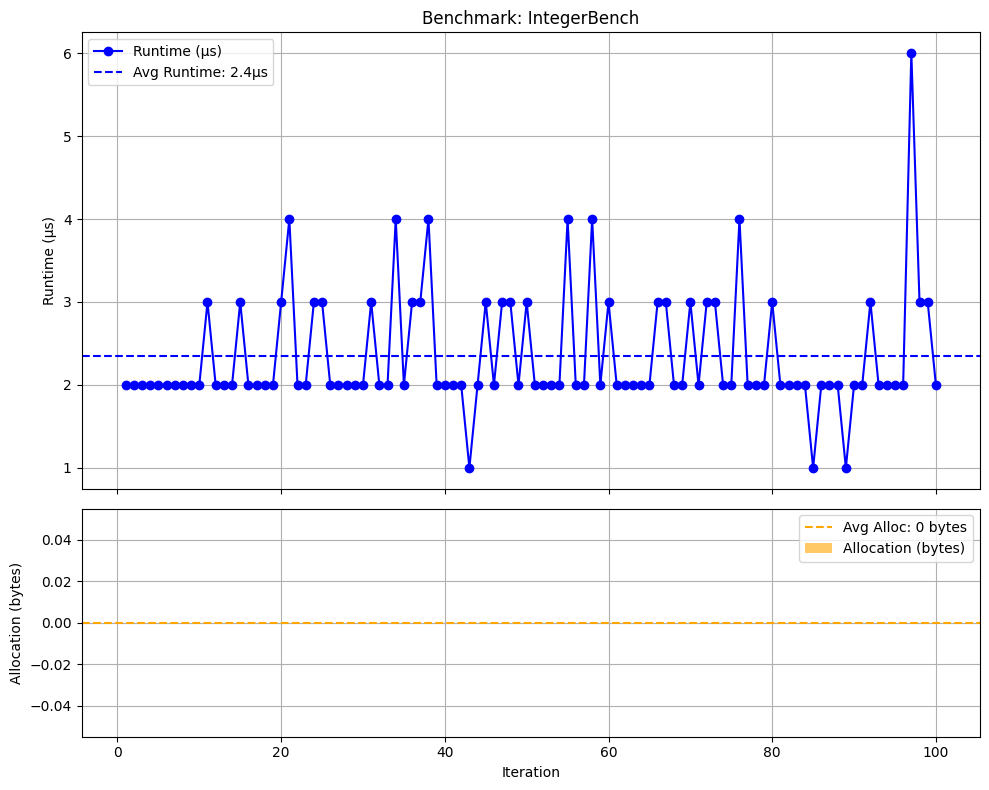

Benchmark: IntegerMedBench, Runs: 100, Runtimes: [27, 10, 10, 9, 9, 11, 9, 13, 25, 10, 9, 9, 10, 9, 9, 9, 9, 8, 12, 13, 12, 9, 9, 9, 10, 9, 10, 9, 9, 13, 10, 9, 13, 9, 9, 12, 9, 10, 9, 9, 9, 9, 13, 9, 9, 11, 8, 9, 13, 13, 9, 13, 8, 9, 9, 13, 8, 12, 10, 9, 8, 9, 9, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 9, 13, 9, 9, 18, 13, 9, 13, 9, 9, 9, 10, 9, 13, 10, 9, 9, 9, 8, 13, 12, 13, 9, 8, 9, 9], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


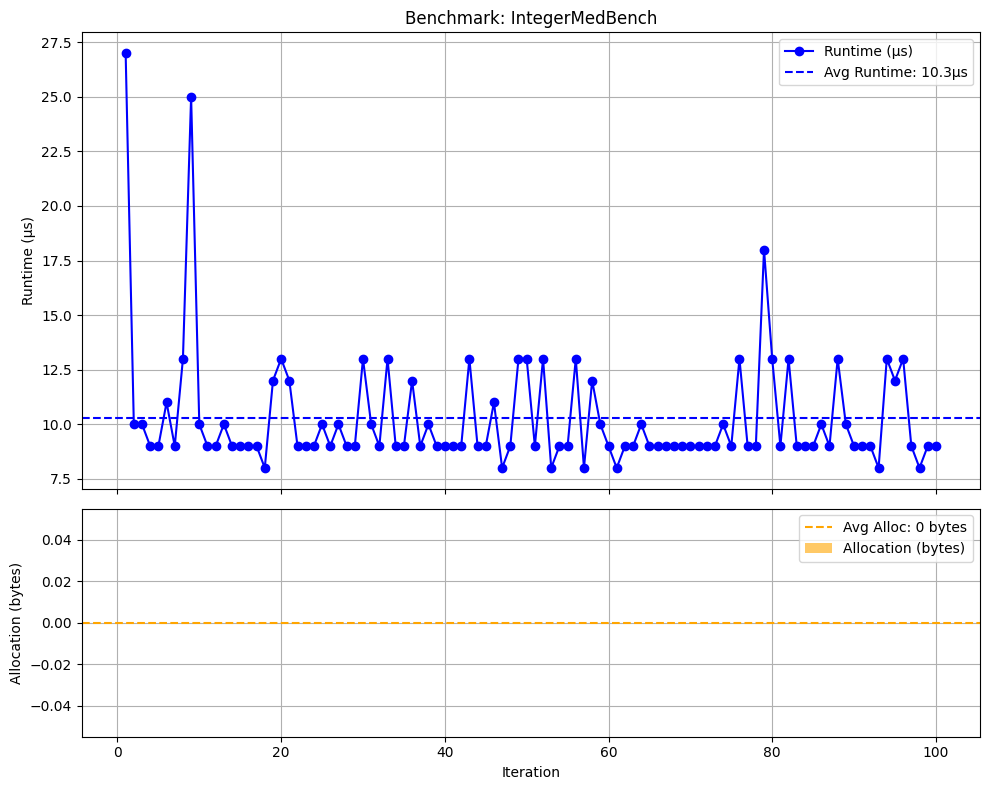

Benchmark: IntegerHighBench, Runs: 100, Runtimes: [74, 70, 69, 70, 76, 80, 67, 82, 73, 82, 79, 66, 74, 69, 70, 74, 69, 69, 70, 71, 70, 72, 69, 79, 66, 67, 70, 68, 69, 70, 70, 70, 66, 71, 69, 66, 83, 71, 69, 72, 71, 66, 72, 66, 73, 66, 65, 69, 69, 68, 69, 76, 68, 69, 71, 66, 66, 65, 72, 68, 66, 69, 73, 68, 70, 75, 66, 72, 70, 98, 70, 75, 70, 72, 65, 71, 69, 78, 69, 71, 72, 69, 69, 69, 79, 70, 69, 66, 66, 73, 71, 68, 68, 75, 70, 70, 73, 69, 69, 71], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


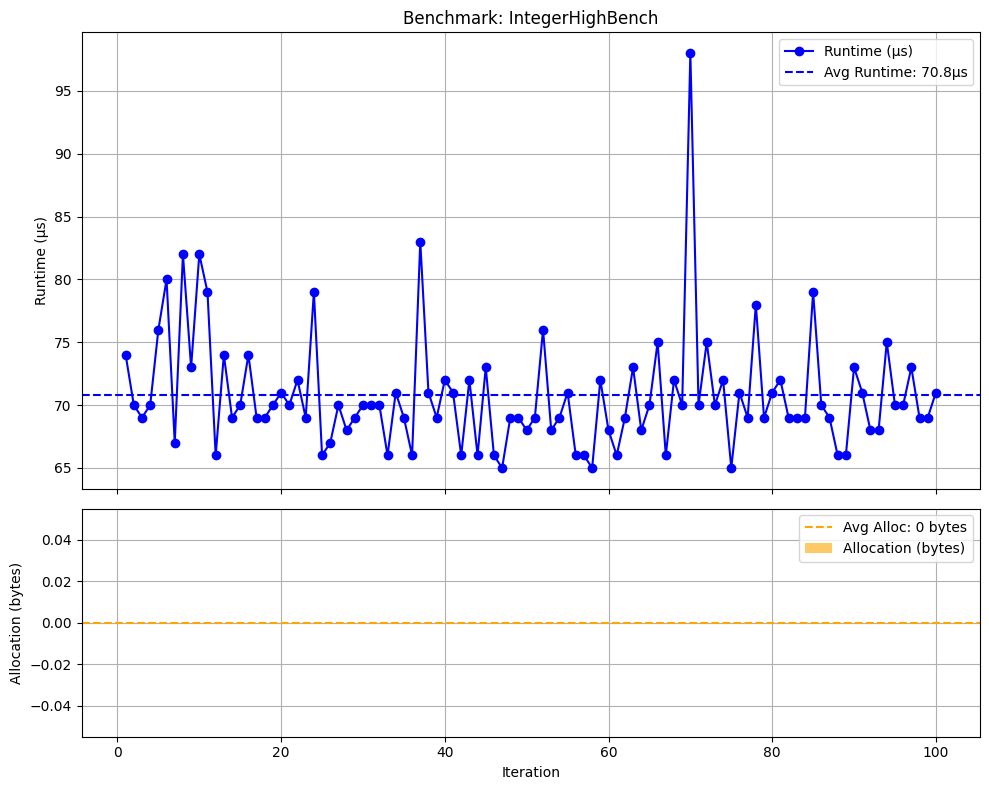

Benchmark: IntegerExpBench, Runs: 100, Runtimes: [48, 48, 43, 49, 39, 40, 57, 41, 41, 48, 50, 42, 43, 41, 40, 43, 50, 42, 51, 41, 45, 41, 39, 116, 49, 43, 42, 43, 41, 43, 48, 45, 39, 116, 40, 40, 44, 40, 40, 52, 42, 40, 42, 52, 39, 42, 55, 41, 40, 41, 41, 58, 39, 45, 43, 54, 43, 44, 49, 39, 46, 52, 56, 46, 46, 74, 40, 42, 48, 40, 44, 48, 44, 42, 50, 49, 40, 45, 40, 44, 41, 44, 42, 40, 50, 47, 41, 41, 48, 52, 42, 40, 39, 43, 44, 41, 40, 40, 40, 40], Allocations: [69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 6

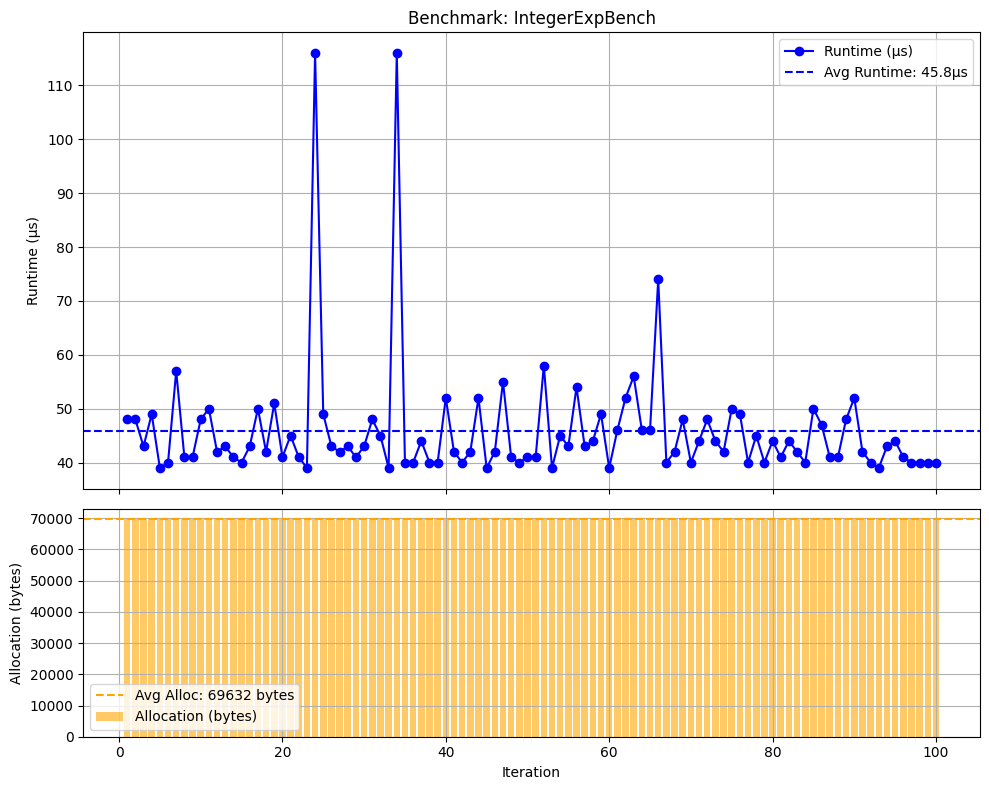

Benchmark: IntegerBigBench, Runs: 100, Runtimes: [488, 472, 480, 426, 486, 460, 484, 454, 467, 485, 469, 469, 467, 469, 475, 476, 458, 473, 483, 462, 476, 489, 476, 473, 426, 481, 487, 498, 480, 469, 462, 433, 467, 544, 501, 491, 443, 465, 465, 454, 482, 466, 455, 505, 472, 450, 653, 468, 502, 470, 485, 451, 471, 473, 461, 527, 437, 457, 473, 503, 493, 466, 454, 479, 504, 489, 479, 469, 504, 487, 489, 512, 488, 472, 494, 505, 485, 480, 477, 439, 452, 516, 515, 465, 487, 454, 479, 469, 2398, 473, 463, 447, 455, 464, 470, 496, 453, 479, 478, 484], Allocations: [475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 47

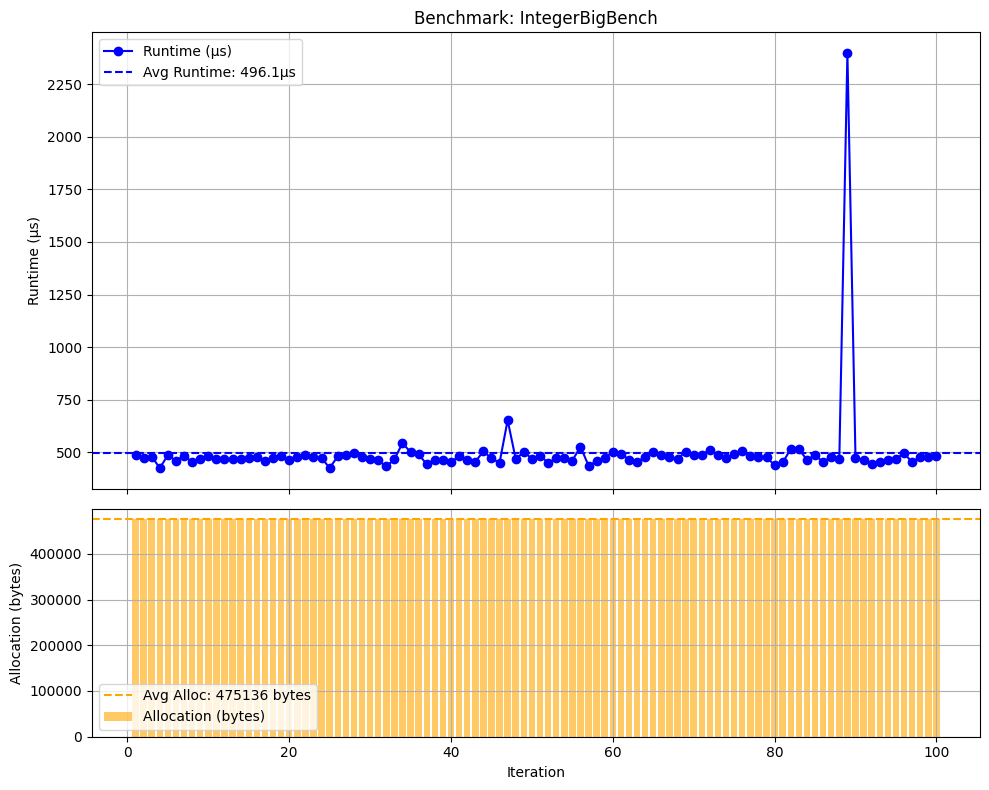

In [4]:
# General Configuration
BENCHMARKS = [
    "DoubleBench",
    "DoubleMedBench",
    "DoubleHighBench",
    "DoubleSqrtBench",
    "DoubleLExpBench",
    "IntegerBench",
    "IntegerMedBench",
    "IntegerHighBench",
    "IntegerExpBench",
    "IntegerBigBench"
]

runs = 100

for benchmark in BENCHMARKS:
    outcome = exec_bench(benchmark, runs)
    print(f"Benchmark: {benchmark}, Runs: {runs}, Runtimes: {outcome[0]}, Allocations: {outcome[1]}")
    plot_results(benchmark, outcome[0], outcome[1])